In [2]:
from sklearn.cluster import DBSCAN
import numpy as np
import pandas as pd

vessel_data = pd.read_csv('vessel_data_with_features.csv')
# Select features for clustering
features = vessel_data[['SOG', 'COG', 'LAT', 'LON']].values

# Apply DBSCAN
dbscan = DBSCAN(eps=1, min_samples=10)
vessel_data['cluster'] = dbscan.fit_predict(features)

# Anomalies are points labeled as -1
vessel_data['anomaly_dbscan'] = vessel_data['cluster'] == -1

# Save results to CSV
vessel_data.to_csv('vessel_data_with_anomalies_dbscan.csv', index=False)
print("Anomalies detected using DBSCAN have been saved to 'vessel_data_with_anomalies_dbscan.csv'")


Anomalies detected using DBSCAN have been saved to 'vessel_data_with_anomalies_dbscan.csv'


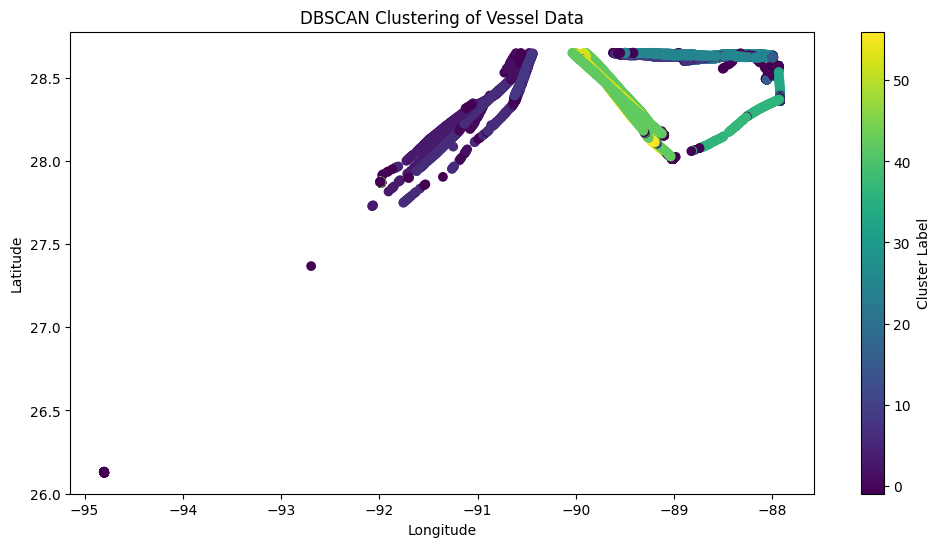

In [3]:
import matplotlib.pyplot as plt

# Visualize clusters
plt.figure(figsize=(12, 6))
plt.scatter(vessel_data['LON'], vessel_data['LAT'], c=vessel_data['cluster'], cmap='viridis')
plt.title('DBSCAN Clustering of Vessel Data')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Cluster Label')
plt.show()

In [5]:
from sklearn.ensemble import IsolationForest

# Train Isolation Forest
clf = IsolationForest(contamination=0.01)
vessel_data['anomaly_isolation_forest'] = clf.fit_predict(features)

# Anomalies are labeled as -1
vessel_data['anomaly_isolation_forest'] = vessel_data['anomaly_isolation_forest'] == -1

# Save results to CSV
vessel_data.to_csv('Generated_csv\\vessel_data_with_anomalies_isolation_forest.csv', index=False)
print("Anomalies detected using Isolation Forest have been saved to 'vessel_data_with_anomalies_isolation_forest.csv'")


Anomalies detected using Isolation Forest have been saved to 'vessel_data_with_anomalies_isolation_forest.csv'


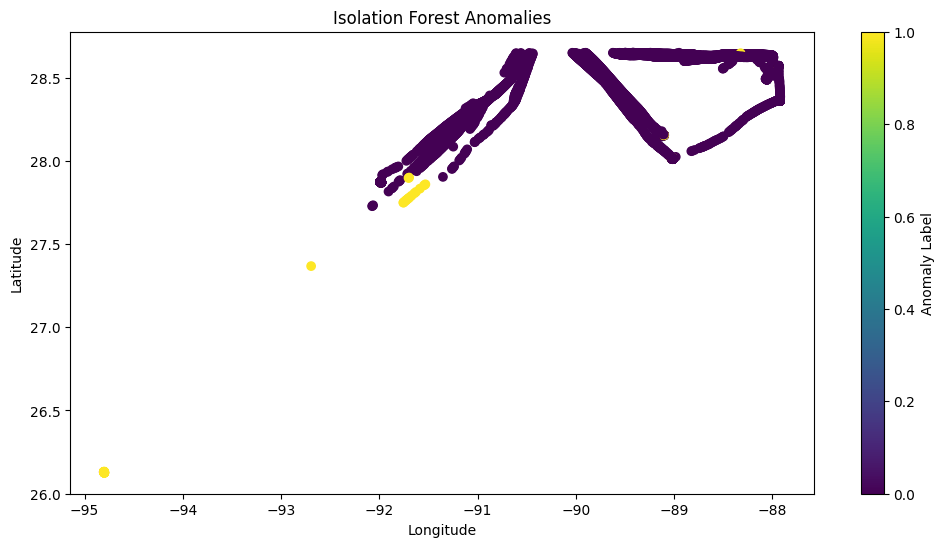

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.scatter(vessel_data['LON'], vessel_data['LAT'], c=vessel_data['anomaly_isolation_forest'], cmap='viridis')
plt.title('Isolation Forest Anomalies')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Anomaly Label')
plt.show()

In [7]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

# Select relevant features
features = vessel_data[['SOG', 'COG', 'LAT', 'LON']].values

# Normalize data
mean = features.mean(axis=0)
std = features.std(axis=0)
features = (features - mean) / std

# Autoencoder architecture
input_dim = features.shape[1]
encoding_dim = 2  # Size of the encoded representation

input_layer = Input(shape=(input_dim,))
encoder = Dense(encoding_dim, activation='relu')(input_layer)
decoder = Dense(input_dim, activation='linear')(encoder)

autoencoder = Model(inputs=input_layer, outputs=decoder)
autoencoder.compile(optimizer='adam', loss='mse')

# Train the autoencoder
autoencoder.fit(features, features, epochs=50, batch_size=32, shuffle=True, validation_split=0.1)

# Calculate reconstruction error
reconstructions = autoencoder.predict(features)
mse = np.mean(np.power(features - reconstructions, 2), axis=1)
vessel_data['anomaly_autoencoder'] = mse > np.percentile(mse, 95)

# Save results to CSV
vessel_data.to_csv('vessel_data_with_anomalies_autoencoder.csv', index=False)
print("Anomalies detected using Autoencoder have been saved to 'vessel_data_with_anomalies_autoencoder.csv'")


Epoch 1/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.2015 - val_loss: 0.6501
Epoch 2/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.9490 - val_loss: 0.5890
Epoch 3/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.8436 - val_loss: 0.5453
Epoch 4/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7398 - val_loss: 0.5268
Epoch 5/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6789 - val_loss: 0.5279
Epoch 6/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5933 - val_loss: 0.5315
Epoch 7/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5072 - val_loss: 0.5068
Epoch 8/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4202 - val_loss: 0.5024
Epoch 9/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3712 - val_loss: 0.4916
Epoch 10/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3363 - val_loss: 0.4790
Epoch 11/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3146 - val_loss: 0.4746
Epoch 12/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step